# Phase 1 Consolidated Contributions

#### Environment Specific Detials:

- Python version: 3.71
- IDE: Jupyter Notebook (core, without Aanaconda)


**Notebook setup**

1. Import Libraries
2. set environmental variables
3. Import Data

In [1]:
#import Libraries
import os
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm
from scipy import stats

In [2]:
#set environmental variables
pd.set_option('display.max_rows', 20)
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

**Data loading may require changing directory**

In [3]:
!

In [4]:
ls

 Volume in drive C has no label.
 Volume Serial Number is 825D-A908

 Directory of C:\Program Files (x86)\Python37-32\Jupyter

11/18/2018  02:29 PM    <DIR>          .
11/18/2018  02:29 PM    <DIR>          ..
11/18/2018  02:29 PM    <DIR>          .ipynb_checkpoints
11/17/2018  04:14 PM    <DIR>          DataSets
11/18/2018  12:09 PM            61,146 i590_FinalProject_Phase1_Consolidated.ipynb
11/11/2018  04:31 PM    <DIR>          notebooks
11/17/2018  03:55 PM            43,905 Phase1_Rushi.ipynb
11/11/2018  02:18 PM    <DIR>          py files
11/18/2018  12:04 PM           319,617 Rushi_Phase1_FinalProject.ipynb
11/18/2018  11:39 AM                72 Untitled.ipynb
11/18/2018  02:29 PM                72 Untitled1.ipynb
               5 File(s)        424,812 bytes
               6 Dir(s)  188,429,152,256 bytes free


In [5]:
#change directory to the data sets folder
os.chdir('DataSets')

In [6]:
#actual data import into pandas data frame
bcd = pd.read_csv('BreastCancer.csv')

1. **Adding meaningful names to columns**
2. **Address missing values**

In [7]:
bcd = bcd.rename(columns={'Scn': 'id', 'A2':'clump_thick', 'A3':'uni_cell_size', 'A4':'uni_cell_shape', 'A5':'marg_adhesion', 'A6':'single_cell_size', 
                          'A7':'bare_nuc', 'A8':'bland_chromatin','A9':'normal_nuc', 'A10':'mitoses'})

In [13]:
bcd.bare_nuc.replace('?', np.NaN)

0       1.0
1      10.0
2       2.0
3       4.0
4       1.0
5      10.0
6      10.0
7       1.0
8       1.0
9       1.0
       ... 
689     1.0
690     1.0
691     5.0
692     1.0
693     1.0
694     2.0
695     1.0
696     3.0
697     4.0
698     5.0
Name: bare_nuc, Length: 699, dtype: float64

In [14]:
 bcd.bare_nuc = pd.to_numeric(bcd.bare_nuc, errors='coerce')

In [16]:
bcd.bare_nuc.isna().sum()

16

In [17]:
bcd.fillna(bcd.mean(), inplace=True)

In [18]:
print(bcd.isna().sum())

id                  0
clump_thick         0
uni_cell_size       0
uni_cell_shape      0
marg_adhesion       0
single_cell_size    0
bare_nuc            0
bland_chromatin     0
normal_nuc          0
mitoses             0
CLASS               0
dtype: int64


## Exploratory Data Analysis

In [19]:
bcd.describe()

,id,clump_thick,uni_cell_size,uni_cell_shape,marg_adhesion,single_cell_size,bare_nuc,bland_chromatin,normal_nuc,mitoses,CLASS
count,6.990000e+02,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000
mean,1.071704e+06,4.417740,3.134478,3.207439,2.806867,3.216023,3.544656,3.437768,2.866953,1.589413,2.689557
std,6.170957e+05,2.815741,3.051459,2.971913,2.855379,2.214300,3.601852,2.438364,3.053634,1.715078,0.951273
min,6.163400e+04,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000
25%,8.706885e+05,2.000000,1.000000,1.000000,1.000000,2.000000,1.000000,2.000000,1.000000,1.000000,2.000000
50%,1.171710e+06,4.000000,1.000000,1.000000,1.000000,2.000000,1.000000,3.000000,1.000000,1.000000,2.000000
75%,1.238298e+06,6.000000,5.000000,5.000000,4.000000,4.000000,5.000000,5.000000,4.000000,1.000000,4.000000
max,1.345435e+07,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,4.000000


In [20]:
#Display varinace of each feature
bcd.iloc[:, 1:10].var()

clump_thick          7.928395
uni_cell_size        9.311403
uni_cell_shape       8.832265
marg_adhesion        8.153191
single_cell_size     4.903124
bare_nuc            12.973335
bland_chromatin      5.945620
normal_nuc           9.324680
mitoses              2.941492
dtype: float64

In [21]:
bcd.iloc[:, 1:10].corr()

,clump_thick,uni_cell_size,uni_cell_shape,marg_adhesion,single_cell_size,bare_nuc,bland_chromatin,normal_nuc,mitoses
clump_thick,1.000000,0.644913,0.654589,0.486356,0.521816,0.587300,0.558428,0.535835,0.350034
uni_cell_size,0.644913,1.000000,0.906882,0.705582,0.751799,0.686801,0.755721,0.722865,0.458693
uni_cell_shape,0.654589,0.906882,1.000000,0.683079,0.719668,0.709606,0.735948,0.719446,0.438911
marg_adhesion,0.486356,0.705582,0.683079,1.000000,0.599599,0.665049,0.666715,0.603352,0.417633
single_cell_size,0.521816,0.751799,0.719668,0.599599,1.000000,0.581261,0.616102,0.628881,0.479101
bare_nuc,0.587300,0.686801,0.709606,0.665049,0.581261,1.000000,0.675896,0.577362,0.338740
bland_chromatin,0.558428,0.755721,0.735948,0.666715,0.616102,0.675896,1.000000,0.665878,0.344169
normal_nuc,0.535835,0.722865,0.719446,0.603352,0.628881,0.577362,0.665878,1.000000,0.428336
mitoses,0.350034,0.458693,0.438911,0.417633,0.479101,0.338740,0.344169,0.428336,1.000000


**Pairs with Highest correlations are:**
1. uniform_cellsize & uniform_cellshape (.91)
2. uniform_cellsize & bland_chromatin (.76)
3. uniform_cellsize & epithelial_cellsize (.75)

In [22]:
bcd.shape

(699, 11)

In [23]:
print('Unique Row Count:', bcd['id'].nunique())

Unique Row Count: 645


There are 645 unique rows. The shape told us there are 699 rows. That means there are duplicate rows

### Plots for futher data exploration

In [24]:
bcd2 = bcd.iloc[:, 1:10]

In [25]:
print(bcd2.head(n=5))

   clump_thick  uni_cell_size  uni_cell_shape  marg_adhesion  \
0            5              1               1              1   
1            5              4               4              5   
2            3              1               1              1   
3            6              8               8              1   
4            4              1               1              3   

   single_cell_size  bare_nuc  bland_chromatin  normal_nuc  mitoses  
0                 2       1.0                3           1        1  
1                 7      10.0                3           2        1  
2                 2       2.0                3           1        1  
3                 3       4.0                3           7        1  
4                 2       1.0                3           1        1  


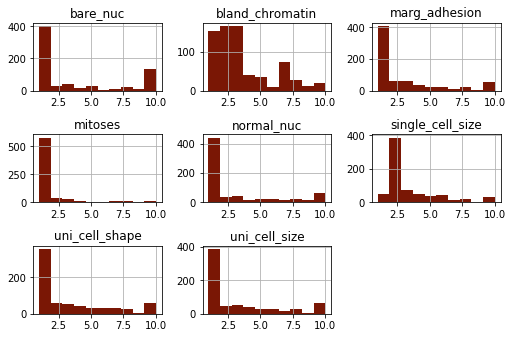

In [28]:
hist = bcd2.iloc[:,1:10].hist(
    grid = True, 
    bins = 10, 
    color = '#7A1705',
    alpha = 1.0
)

plt.tight_layout(rect=(0,0,1.2,1.2))

Text(0, 0.5, 'count')

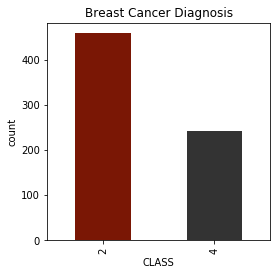

In [27]:
bar = bcd.groupby(['CLASS'])['id'].count().plot.bar(figsize=(4,4),color=('#7A1705','#333333'),title='Breast Cancer Diagnosis')
plt.ylabel('count')

**Editing values for Chart lables**

In [30]:
bcd['diagnosis'] = np.where(bcd['CLASS']==2, 'Benign', 'Malignant')

In [32]:
benign = bcd.loc[bcd['diagnosis'] == 'Benign']
malignant = bcd.loc[bcd['diagnosis'] == 'Malignant']

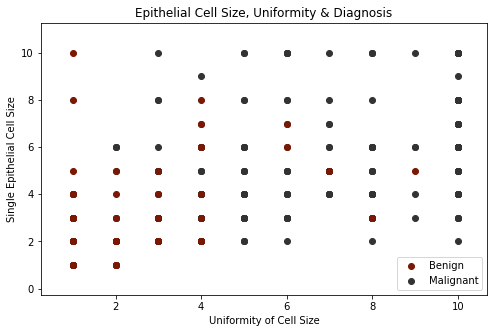

In [34]:
#Define color dictionary & Figure size
color_dict = ['#7A1705', '#333333']
_ = plt.figure(figsize=(8,5))

#Create plot
scatter_malig = plt.scatter(malignant['uni_cell_size'], malignant['single_cell_size'], color=color_dict[1])
scatter_benign = plt.scatter(benign['uni_cell_size'], benign['single_cell_size'], color=color_dict[0])

#Define plot legend
_ = plt.legend((scatter_benign, scatter_malig),('Benign', 'Malignant'))

#Refine plot options
_ = plt.title('Epithelial Cell Size, Uniformity & Diagnosis')
_ = plt.xlabel('Uniformity of Cell Size')
_ = plt.ylabel('Single Epithelial Cell Size')
_ = plt.margins(x=0.075, y=0.125)

> Summarize by reporting which values might need standardization in the future (too much variation) and any other observations that you may discover as a Data Scientist.

- **Columns A7, A3, A9 all have standard deviation greater than 3. A standard normal distribution has sd of 1. Probably these columns at least could use standardization.**

- **Beyond statics, I think there needs to a level of subject matter of expertise to make this decision. data scientist differentiate themselves from software developers and data engineers by having domian knowledge they marry with statics and data engineering**